In [44]:
import random
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
# Part 1 of problem
#==================

# I assume in what follows that the dices are fair.

In [4]:
# Implementation of the first strategy, which I denote here as strategy1

lowest_val  = 1  # dice lowest value
highest_val = 10 # dice highest valie


def calculate_score(X,Y):
        """
        Returns basic score for pair of dice outcomes X and Y
        """
        total_score = X + Y
        
        a = X % highest_val
        b = Y % highest_val
        
        rule_1 = (abs(a-b)==1 or abs(a-b)==highest_val-1)
        rule_2 = (X==Y)
        
        if (rule_1):
            total_score *= 2
        
        if (rule_2):
            total_score -= (X**2)
            
        return total_score
    
# I create a 10x10 matrix to store my basic scores. Will need them many times
# ... and won't have to recalculate them at every turn!

basic_score_matrix = np.zeros((highest_val,highest_val))
for i in range(highest_val):
    for k in range(i,highest_val):
        basic_score_matrix[i][k] = calculate_score(i+1,k+1)
        basic_score_matrix[k][i] = basic_score_matrix[i][k]

print("basic_score_matrix = \n", basic_score_matrix)

basic_score_matrix = 
 [[  1.   6.   4.   5.   6.   7.   8.   9.  10.  22.]
 [  6.   0.  10.   6.   7.   8.   9.  10.  11.  12.]
 [  4.  10.  -3.  14.   8.   9.  10.  11.  12.  13.]
 [  5.   6.  14.  -8.  18.  10.  11.  12.  13.  14.]
 [  6.   7.   8.  18. -15.  22.  12.  13.  14.  15.]
 [  7.   8.   9.  10.  22. -24.  26.  14.  15.  16.]
 [  8.   9.  10.  11.  12.  26. -35.  30.  16.  17.]
 [  9.  10.  11.  12.  13.  14.  30. -48.  34.  18.]
 [ 10.  11.  12.  13.  14.  15.  16.  34. -63.  38.]
 [ 22.  12.  13.  14.  15.  16.  17.  18.  38. -80.]]


In [5]:
def strategy1_score(number_of_trials,lowest_val=1,highest_val=10):
    """
    Function returns a numpy array of the scores
    *lowest_val = lowest value on dice
    *highest_val = highest value on dice
    """
    total_score_array = []
    for case in range(number_of_trials):
        dice_1 = random.randint(lowest_val,highest_val) # outcome of first dice
        dice_2 = random.randint(lowest_val,highest_val) # outcome of second dice
        
        total_score = basic_score_matrix[dice_1-1][dice_2-1]
            
        total_score_array.append(total_score)
        
        #C: comment this out
        #C: interesting, let's see...
        #if (total_score==42):
        #    print("score is {score}, dice_1={d1} dice_2={d2}".format(score=total_score,d1=dice_1,d2=dice_2))
        
    return np.array(total_score_array)
    

In [6]:
# Given that the standard deviation of the possible scores is high 
# (mostly above the mean score for strategy1 -- because of outliers in the scores),
# it may be better to use the median as the expectation value of the score, rather than the mean, 
# when the number of runs is relatively small (say<1000).

In [42]:
def play_zarconia(score_func,number_trials,lowest_val=1,highest_val=10,vbins=20):
    """
    The function returns: i) a histogram plot of the scores, and 
                         ii) the median of the results as expectation value.
    Inputs are:
        1. score_func = a function describing how scores are marked
        2. number_trials = number of runs
        3. lowest_val = lowest value of dice
        4. highest_val = highest value of dice
        5. vbins = bins value for the histogram
    """
    trial_scores = pd.Series(score_func(number_trials,lowest_val,highest_val))
    print(trial_scores.describe())
    print(" ")
    trial_scores.hist(bins=vbins)
    print("Expectation value of score = {expectation_value}".format(expectation_value=trial_scores.mean()
                                                                   )
         )
    #C: Uncomment the line below if you want to see the normalized frequencies of the scores
    #print(trial_scores.value_counts(normalize=True))

count    1000000.000000
mean           9.335466
std           16.443211
min          -80.000000
25%            8.000000
50%           11.000000
75%           15.000000
max           38.000000
dtype: float64
 
Expectation value of score = 9.335466


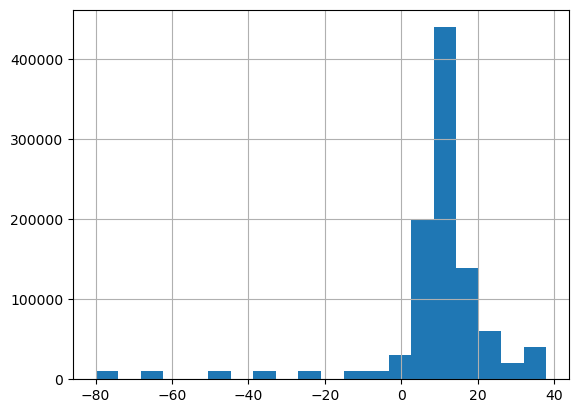

In [43]:
#Example, say we want to play the Zarconia game in 10**6 runs. Then,

play_zarconia(strategy1_score,number_trials=10**6,lowest_val=lowest_val,highest_val=highest_val)

In [9]:
# ANALYTICAL EXPRESSION FOR THE EXPECTATION VALUE OF THE SCORE ACCORDING TO STRATEGY1:

# E[score] = \Sum_{(X,Y)} prob(X,Y)*[X+Y+bonus(X,Y)-penalty(X,Y)]
#          = [(N+1)/N]*[(4*N+11)/6]   
# where N = maximum value on dice.


def prob(X,Y):
    result = 2/(highest_val**2) #frequency of THIS pair (X,Y), with X!=Y.
    if (X==Y):
        result = 1/(highest_val**2) #frequency of THIS pair (X,Y), with X==Y.
    return result

def bonus(X,Y):
    a = X % highest_val
    b = Y % highest_val        
    condition = (abs(a-b)==1 or abs(a-b)==highest_val-1)
    result = 0
    if (condition):
        result = X+Y
    return result

def penalty(X,Y):
    result = 0
    if (X==Y):
        result = X*X
    return result

def strategy1_analytic_score_expectation_value():
    expectation_value = 0.0
    for X in range(lowest_val,highest_val+1):
        for Y in range(X,highest_val+1):
            expectation_value +=prob(X,Y)*float(X+Y+bonus(X,Y)-penalty(X,Y))
    return expectation_value

In [10]:
# I calculate below the analytical expectation value of the score using strategy1:

print(strategy1_analytic_score_expectation_value())

9.35


In [11]:
# We note that this value is close to the value we got above from the simulation.

In [12]:
# A general and simple analytic expression for the expectation value of the score from strategy1:
# N is the maximum value on the dice (values running from 1 to N, extrema included, of course).

def re_strategy1_analytic_score_expectation_value(N):
    result = 0
    
    if (N==0):
        return 0
    
    if (N==1):
        result = 1
        
    if (N>1):
        result = (N+1)*(4*N+11)/(6*N)
        if (N==2):
            result -= 1.5
    
    return result

In [13]:
def plot_re_strategy1_analytic_score_expectation_value(Nlist):
    data = []
    for x in Nlist:
        y = re_strategy1_analytic_score_expectation_value(x)
        data.append(y)
    plt.scatter(Nlist,data)
    plt.xlabel('N')
    plt.ylabel('E[s], score expectation value')
    plt.title('E[s] in function of N')
    plt.show()
    
    print("{:^15} {:^15}\n".format('N','E[s]'))
    for n in range(len(Nlist)):
        print("{:^15} {:^15}".format(Nlist[n],round(data[n],4)))

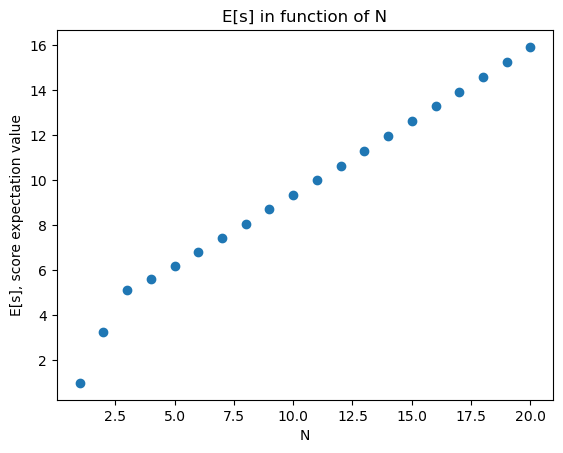

       N             E[s]      

       1               1       
       2             3.25      
       3            5.1111     
       4             5.625     
       5              6.2      
       6            6.8056     
       7            7.4286     
       8            8.0625     
       9            8.7037     
      10             9.35      
      11             10.0      
      12            10.6528    
      13            11.3077    
      14            11.9643    
      15            12.6222    
      16            13.2812    
      17            13.9412    
      18            14.6019    
      19            15.2632    
      20            15.925     


In [14]:
# Plot E[s] in function of N
Nlist = [i for i in range(1,21)]
plot_re_strategy1_analytic_score_expectation_value(Nlist)

In [15]:
## Part 2 of problem
#===================



In [16]:
# Implementation of updated strategy

# With this strategy, we re-roll the dice (X) with the smaller outcome when the other dice (Y) has an outcome < 5
# OR when X==Y.

def strategy2_score(number_of_trials,lowest_val=1,highest_val=0):
    """
    Function returns a numpy array of the scores
    *lowest_val = lowest value on dice
    *highest_val = highest value on dice
    """
    total_score_array = []
    
    for case in range(number_of_trials):
        dice_1 = random.randint(lowest_val,highest_val) # outcome of first dice
        dice_2 = random.randint(lowest_val,highest_val) # outcome of second dice

        X = min(dice_1,dice_2)
        Y = max(dice_1,dice_2)
        BOOL = (X==Y)  
        rule_0 = ((Y<11) or BOOL)
        
        if (rule_0):
            X = random.randint(lowest_val,highest_val)
            
        total_score = basic_score_matrix[X-1][Y-1]
            
        total_score_array.append(total_score)
        

    return np.array(total_score_array)

count    1.000000e+07
mean     9.679814e+00
std      2.059372e+01
min     -8.000000e+01
25%      9.000000e+00
50%      1.300000e+01
75%      1.600000e+01
max      3.800000e+01
dtype: float64
 
Expectation value of score = 9.6798142


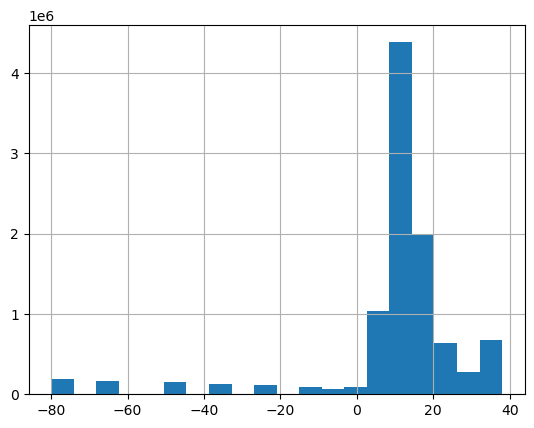

In [17]:
# Let's play the same game, but now with the updated, i.e. strategy2_score:
# Example, say we want to play the game with 10**6 runs as we did before. Then,

play_zarconia(strategy2_score,number_trials=10**7,lowest_val=lowest_val,highest_val=highest_val)


In [18]:
#The last input clearly shows that this second strategy improves the expectation score value 
# ... with respect to the previous strategy.
# This comes as no surprise since, with the second roll, we get the chance to avoid incurring some penalties, 
# albeit not always successful.

In [19]:
# This second strategy certainly yields higher scores compared to the first strategy, mostly 
# because we re-roll the dice with the smaller value and maintain the value of the other dice to be >=5.

In [20]:
# ANALYTICAL EXPRESSION FOR THE EXPECTATION VALUE OF THE SCORE ACCORDING TO STRATEGY2:

# E[score,n] = \Sum_{(X,Y)} prob(X,Y)*f_{step}(X,Y,n)*[X+Y+bonus(X,Y)-penalty(X,Y)]
#                + prob(X,Y)*[1-f_{step}(X,Y,n)]*[\Sum_{z} prob(z,Y)* [z+Y+bonus(z,Y)-penalty(z,Y)]]

# where X=min(dice1,dice2), Y=max(dice1,dice2), 1<=z<=10, and
# f_{step}(X,Y,n) = a step function which is 0 when Y<n or X==Y, and 1 otherwise.

# I implement the expression below as 'strategy2_analytic_score_expectation_value(n):'

def f_step_function(X,Y,n):
    result = 1.0
    if (Y<n or X==Y):
        result = 0.0
    return result

def expectation_value_of_second_roll(Y):
    """
    Returns expectation value of score at the second turn
    if the second dice has outcome Y.
    """
    result = 0.0
    for z in range(lowest_val,highest_val+1):
        #result += prob(z,Y)*float(z+Y+bonus(z,Y)-penalty(z,Y))
        result += float(z+Y+bonus(z,Y)-penalty(z,Y))/highest_val
    return result

# Since we shall need to call expectation_value_of_second_roll(Y) several times,
# I prefer creating a list of all its possible outcomes (which are 10 in total)
# and then just call the values when needed.
expectation_value_of_second_roll_list = []
for m in range(lowest_val,highest_val+1):
    result = expectation_value_of_second_roll(m)
    expectation_value_of_second_roll_list.append(result)

def strategy2_analytic_score_expectation_value(n):
    global expectation_value_of_second_roll_list
    expectation_value = 0
    for N in range(lowest_val,highest_val+1):
        for M in range(N,highest_val+1):
            X = min(N,M)
            Y = max(N,M)
            #print('X, Y =',X,Y)
            if (f_step_function(X,Y,n)==1.0):
                expectation_value +=prob(X,Y)*float(X+Y+bonus(X,Y)-penalty(X,Y))
            else:
                expectation_value +=prob(X,Y)*expectation_value_of_second_roll_list[Y-1]
    return expectation_value    

In [21]:
# I calculate below the numerically values of the analytic expectation values of the score in function of n,
# where n is the integer we choose to roll the dice a second time if Y(which is max(dice1,dice2)) happens to be
# less than it.

decimal_precision = 5

print("{:^10} {:>5}".format("n","expectation value of score (analytical)"))
for n in range(lowest_val,highest_val+2): # '+2' because we want to include the case Y<11
    answer = strategy2_analytic_score_expectation_value(n)
    print("{:^10} {:>5}".format(n,round(answer,decimal_precision)))

    n      expectation value of score (analytical)
    1      13.035
    2      13.035
    3      13.073
    4      13.145
    5      13.215
    6      13.235
    7      13.145
    8      12.873
    9      12.335
    10     11.435
    11     9.665


In [22]:
# From the values above, we see that the expectation value of the score decreases as we increase n. 
# This is related to the fact that, as we increase n, there is more chance that we incur a penalty at the second roll.

# The fact that the expectation value of the score in the cases n=1 and n=2 coincide with each other
# is easily deducible from the analytical expression given above for the expectation value of the score.

# Obviously, because the maximum value either dice can have is 10, 
# the expectation value for n=11 is a tight lower bound for the expectation value of the scores as a function of n.
# In other words, for n>=11, the expectation value is 2.3565. 
# Analogously, 12.3145 is tight upper bound on the expectation value.

In [23]:
# Part 3
#=======
# Let X=min(dice1, dice2)
# Let Y=max(dice1, dice2)
# Say we choose a strategy whereby we role dice with the X value if X==Y or total_score<mean(score_of_strategy1=9)
# -- as suggested by Jan to be a possibly good strategy.
# Let's call this 'strategy3_score'

def strategy3_score(number_of_trials,lowest_val=1,highest_val=10):
    """
    Function returns a numpy array of the scores
    *lowest_val = lowest value on dice
    *highest_val = highest value on dice
    """
    total_score_array = []
    
    for case in range(number_of_trials):
        dice_1 = random.randint(lowest_val,highest_val) # outcome of first dice
        dice_2 = random.randint(lowest_val,highest_val) # outcome of second dice

        X = min(dice_1,dice_2)
        Y = max(dice_1,dice_2)
        BOOL = (X==Y)
        cutoff_score = 9
        
        total_score = basic_score_matrix[X-1][Y-1]
        
        rule_0 = ((total_score < cutoff_score) or BOOL)
        
        if (rule_0):
            X = random.randint(lowest_val,highest_val)
            total_score = basic_score_matrix[X-1][Y-1]
            
        total_score_array.append(total_score)
        
    return np.array(total_score_array)

count    1000000.000000
mean          13.662144
std            9.389391
min          -80.000000
25%           10.000000
50%           13.000000
75%           16.000000
max           38.000000
dtype: float64
 
Expectation value of score = 13.662144


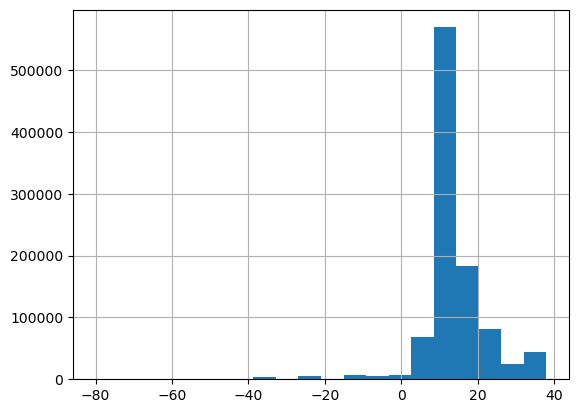

In [24]:
# Let's play the same game, but now with the updated, i.e. strategy3_score:
# Example, say we want play the game with 10**6 runs as we did before. Then,

play_zarconia(strategy3_score,number_trials=10**6,lowest_val=lowest_val,highest_val=highest_val)

In [25]:
# This strategy looks better than both strategy1 and strategy2, if we look at the median score (here 13).

In [26]:
# ANALYTICAL EXPRESSION FOR THE EXPECTATION VALUE OF THE SCORE ACCORDING TO STRATEGY3:

# We can write an analytical expression for the expectation value of the score according to strategy3, but
# I'm not going to do that here beacuse it is very similar to the one we wrote for strategy2.
# I will rather implement the analytical expression below here as 'strategy3_analytic_score_expectation_value(cutoff_score)'
# where the meaning of 'cutoff_score' is obvious.

def g_step_function(X,Y,tot_score,cutoff_score):
    result = 1.0
    if (tot_score<cutoff_score or X==Y):
        result = 0.0
    return result


def strategy3_analytic_score_expectation_value(cutoff_score):
    global expectation_value_of_second_roll_list
    expectation_value = 0
    for N in range(lowest_val,highest_val+1):
        for M in range(N,highest_val+1):
            X = min(N,M)
            Y = max(N,M)
            tot_score = calculate_score(X,Y)
            if (g_step_function(X,Y,tot_score,cutoff_score)==1.0):
                expectation_value +=prob(X,Y)*float(X+Y+bonus(X,Y)-penalty(X,Y))
            else:
                expectation_value +=prob(X,Y)*expectation_value_of_second_roll_list[Y-1]
    return expectation_value    

In [27]:
# I calculate below the numerical values of the analytic expectation values of the score 
# in function of cutoff_score. I choose 0<=cutoff_score<=maximum_possible_score
# -- where, obviously, in this case, maximum_possible_score = 38.

decimal_precision = 5
maximum_possible_score = 39

print("{:^25} {:>5}".format("cutoff_score","expectation value of score (analytical)"))
for cutoff_score in range(maximum_possible_score+1): # '+2' because we want to include the case Y<11
    answer = strategy3_analytic_score_expectation_value(cutoff_score)
    print("{:^25} {:>5}".format(cutoff_score,round(answer,decimal_precision)))

      cutoff_score        expectation value of score (analytical)
            0             13.035
            1             13.035
            2             13.035
            3             13.035
            4             13.035
            5             13.131
            6             13.221
            7             13.409
            8             13.535
            9             13.669
           10             13.749
           11             13.745
           12             13.699
           13             13.523
           14             13.319
           15             12.965
           16             12.735
           17             12.465
           18             12.295
           19             11.945
           20             11.945
           21             11.945
           22             11.945
           23             11.441
           24             11.441
           25             11.441
           26             11.441
           27             11.129
          

In [28]:
# From the table above, we see that the expectation value for the score either decreases (or stay constant in an interval)
# with respect to the cutoff_score. In general, the higher the cutoff_score, the lower the expectation value of the score.

# Here too, we find that the expectation value has a tight upper bound of 12.3145, which is the same upper bound
# we found for strategy2 when n<=2.

In [29]:
# BUT a good strategy, in my opinion, would be one where we have the chance of incurring a penalty minimized.
# Hence, one can accumulate positive points as much as possible.

# The probability that one incurs a penalty is P(X==Y) = 10/100 = 0.1 at a single run. 
# Thus, a chance of 0.9 of NOT incurring a penalty.

# Thus, in strategy1, the player gets penalized 10% of the time.

# In strategy2, the probability P of getting penalized is: 
#                    P = [P(Y<5 or X==Y)]*P(X==Y)
#                    P = [0.16 + 0.1]*0.1
#                    P = 0.026
# In general, for strategy2,
#                    P = [P(Y<n or X==Y)]*P(X==Y)
#                    P = [n*(n-1)/100 + P(X==Y)]*P(X==Y)

# For strategy3, the probability P of getting a penalty is:
#                    P = [P(first_score<9 or X==Y)]*P(X==Y)
# One can write a mathematical expression for the probability above and even extend it for a generic 'cutoff_score':
#                    P = [P(first_score<cutoff_score or X==Y)]*P(X==Y)     Eq. ***
# This can be done using enumerative combinatorics. A neat way to do this in Python is to use symPy.
# I am not going to write the analytical mathematical expression here for the sake of convenience.


In [30]:
# Continuing with the last comment above, if we choose to re-roll ONLY X during the second turn based on a condition C
#  -- besides the condition X==Y -- we note that C will most probably increase the probability of incurring a penalty
# at the second turn because [P(C or X==Y)]>= P(X==Y). 
# Thus, the probability of getting a penalty at the second turn based on the composite condition (C or X==Y) has 
# a tight lower bound of value:
#                    P = [P(C or X==Y)]*P(X==Y) >=  P(X==Y)*P(X==Y)
#                    P >= 0.01
# This means that a good strategy could be to simply re-roll X when X==Y.
# This strategy, which I call 'strategy4', is equivalent to strategy2 with C=(Y<1) (or even C=Y<2). 
# Hence, we expect the analytical expectation value of the score to be 12.3145 for strategy4.

In [31]:
# I implement the score function for strategy4 below as 'strategy4_score' and simulate the play with a million runs.

In [32]:
def strategy4_score(number_of_trials,lowest_val=1,highest_val=10):
    """
    Function returns a numpy array of the scores
    *lowest_val = lowest value on dice
    *highest_val = highest value on dice
    """
    total_score_array = []
    
    for case in range(number_of_trials):
        dice_1 = random.randint(lowest_val,highest_val) # outcome of first dice
        dice_2 = random.randint(lowest_val,highest_val) # outcome of second dice

        X = min(dice_1,dice_2)
        Y = max(dice_1,dice_2) 
        
        rule_0 = (X==Y)
        
        if (rule_0):
            X = random.randint(lowest_val,highest_val)
        
        total_score = basic_score_matrix[X-1][Y-1]
            
        total_score_array.append(total_score)
        

    return np.array(total_score_array)

count    1000000.000000
mean          13.043482
std            8.663881
min          -80.000000
25%            9.000000
50%           12.000000
75%           15.000000
max           38.000000
dtype: float64
 
Expectation value of score = 13.043482


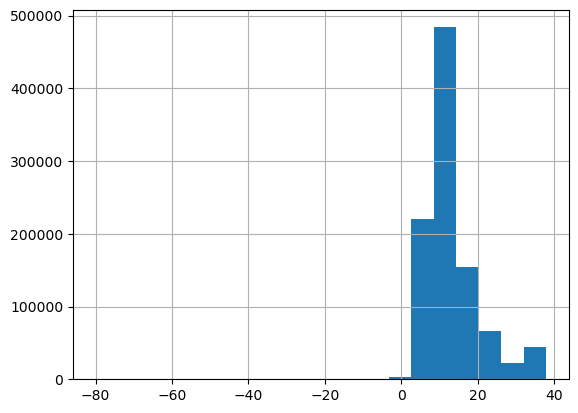

In [33]:
#let's play the same game, but now with the updated, i.e. strategy4_score:
#Example, say we want play the game with 10**6 runs as we did before. Then,

play_zarconia(strategy4_score,number_trials=10**6,lowest_val=lowest_val,highest_val=highest_val)

In [34]:
# As we can see from the last histogram above, compared to those of strategy1, strategy2 and strategy3,
# we hardly incur a penalty when we use strategy4.

In [35]:
# FINAL COMMENTS:

# One may ask why the score expectation value obtained from the analytical expressions
# in the cases of strategy2, strategy3 and strategy4 (if you want), are not that close to the simulated expectation values
# as we saw in the case of strategy1.
# The answer to this is that the possibility of re-rolling a second dice based on a certain condition implies that
# we need relatively more runs than we needed in strategy1 (where we didn't re-roll any dice) in order to reasonably
# converge the simulation. 

# Analytical analyses done above may easily to extended to considering whether to roll all two dices or not 
# -- and if YES, under what optimal conditions.